# Speech Denoising Using Fully Connected Neural Network

In [0]:
import tensorflow as tf
import numpy as np
import librosa
import numpy as np
from tensorflow.contrib import layers
import IPython.display as ipd

Loading FIles

In [81]:
from google.colab import files
uploaded = files.upload()

Check the Uploaded files

In [7]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test_x_01.wav" with length 145284 bytes
User uploaded file "test_x_02.wav" with length 388752 bytes
User uploaded file "train_clean_male.wav" with length 2522886 bytes
User uploaded file "train_dirty_male.wav" with length 2522898 bytes


In [0]:
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X_i=librosa.stft(sn, n_fft=1024, hop_length=512)

sn, sr=librosa.load('test_x_01.wav', sr=None)
X1_test=librosa.stft(sn, n_fft=1024, hop_length=512)

sn, sr=librosa.load('test_x_01.wav', sr=None)
X1_test_main=librosa.stft(sn, n_fft=1024, hop_length=512)

sn, sr=librosa.load('test_x_02.wav', sr=None)
X2_test=librosa.stft(sn, n_fft=1024, hop_length=512)

sn, sr=librosa.load('test_x_02.wav', sr=None)
X2_test_main=librosa.stft(sn, n_fft=1024, hop_length=512)


In [9]:
X1_test_main= np.transpose(X1_test_main)
X1_test_main.shape

(142, 513)

**Taking absolute and Transpose**

In [0]:
mod_X= np.abs(X_i)
mod_S= np.abs(S)
mod_X = np.transpose(mod_X) 
mod_S = np.transpose(mod_S)

**Taking absolute and Transppopse 
**

In [0]:
X1_test= np.abs(X1_test)
X2_test= np.abs(X2_test)

X1_test = np.transpose(X1_test) 
X2_test = np.transpose(X2_test)

**Building NN**

In [0]:
X= tf.placeholder(tf.float32, [None, 513], name= "Input")
Y= tf.placeholder(tf.float32, [None, 513], name= "Output")
keep_prob = tf.placeholder("float")

Input Layer

In [0]:
initializer = tf.initializers.he_normal()
weights_1 = tf.Variable(initializer([513, 1024]))
biases_1 = tf.Variable(tf.zeros([1024]))
hidden_1 = tf.nn.leaky_relu(tf.matmul(X, weights_1) + biases_1)

Hidden Layer 1


In [0]:

weights_2 = tf.Variable(initializer([1024, 1024]))
biases_2 = tf.Variable(tf.zeros([1024]),name="Bias2")
hidden_2 = tf.nn.leaky_relu(tf.matmul(hidden_1, weights_2) + biases_2)

Hidden Layer 2

In [0]:

weights_3 = tf.Variable(initializer([1024, 1024]))
biases_3 = tf.Variable(tf.zeros([1024]),name="Bias2")
hidden_3 = tf.nn.leaky_relu(tf.matmul(hidden_2, weights_3) + biases_3)

Hidden Layer 3

In [0]:

weights_5 = tf.Variable(initializer([1024, 1024]))
biases_5 = tf.Variable(tf.zeros([1024]),name="Bias2")
hidden_5 = tf.nn.relu(tf.matmul(hidden_3, weights_5) + biases_5)

Output Layer

In [0]:
weights_4 = tf.Variable(initializer([1024, 513]))
biases_4 = tf.Variable(tf.zeros([513]),name="Bias3")
Ylogits = tf.matmul(hidden_3, weights_4) + biases_4
output = tf.nn.relu(Ylogits)

In [0]:
cross_entropy= tf.reduce_mean(tf.squared_difference(Ylogits,  Y))
optimizer= tf.train.AdamOptimizer(0.0002)
train_step= optimizer.minimize(cross_entropy)


In [0]:
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  batch_size = 50
  epoch = 500
  iterations = int(mod_X.shape[0]/ batch_size)
  for e in range(epoch):
    #print(e)
    for i in range(iterations):
      batch_start= (i * batch_size) % (mod_X.shape[0]- batch_size)
      batch_end= batch_start + batch_size
      #print(batch_start, batch_end)
      batch_X = mod_X[batch_start:batch_end]
      batch_Y = mod_S[batch_start:batch_end]
      #print(type(batch_X))
      #print(type(batch_Y))
      train_data = {X:batch_X, Y:batch_Y}
      sess.run(train_step, feed_dict = train_data)
      print(sess.run(cross_entropy, feed_dict = train_data))
  #print("Expected Class Scores Yogs : ", sess.run(fetches= Ylogits, feed_dict={X:X1_test }))
  out_vec = sess.run(fetches= output, feed_dict={X:X1_test})
  out_vec2 = sess.run(fetches= output, feed_dict={X:X2_test})
  
   
      

In [0]:
s_cap_test_mod = out_vec
s_cap_test_mod2 = out_vec2
s_cap_test_mod = np.transpose(s_cap_test_mod)
s_cap_test_mod2 = np.transpose(s_cap_test_mod2)



X1_test_mod_X1_test=np.transpose(np.divide(X1_test_main, np.abs(X1_test_main)))
X2_test_mod_X1_test=np.transpose(np.divide(X2_test_main, np.abs(X2_test_main)))
X1_test_mod_X1_test = np.transpose(X1_test_mod_X1_test)
s_cap_test_mod = np.transpose(s_cap_test_mod)
s_cap_test_mod2 = np.transpose(s_cap_test_mod2)

s_cap = np.multiply(X1_test_mod_X1_test,s_cap_test_mod )
s_cap = np.transpose(s_cap)
s_cap.shape
s_cap2 = np.multiply(X2_test_mod_X1_test,s_cap_test_mod2 )
s_cap2 = np.transpose(s_cap2)
s_cap2.shape

**Cnvertong to WAVE FILE**

In [0]:
small_s = librosa.istft(s_cap,  hop_length=512)
s1=small_s
librosa.output.write_wav('test_s_01_recons.wav', small_s, sr)
from google.colab import files
files.download('test_s_01_recons.wav')


**Noisy Input FIle**

In [95]:
sn, sr=librosa.load('test_x_01.wav', sr=None)
X1_test=librosa.stft(sn, n_fft=1024, hop_length=512)
small_si = librosa.istft(X1_test,  hop_length=512)
#s1=small_s

ipd.Audio(small_si, rate=sr)


**Denoised  output** 

In [98]:
ipd.Audio(s1, rate=sr)

Orange is Recovered Signal and Blue is Original Signal


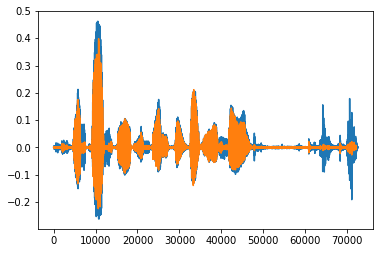

In [122]:
sn, sr=librosa.load('test_x_01.wav', sr=None)
plt.plot(sn)

sn, sr=librosa.load('test_s_01_recons (8).wav', sr=None)
plt.plot(sn)
print("Orange is Recovered Signal and Blue is Original Signal")

**Calculating SNR**

In [65]:
s, sr=librosa.load('test_x_01.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)


S= librosa.istft(S, win_length=1024, hop_length=512)


num = np.dot(S, S.T)
den = np.dot(S - s1, (S-s1).T)
SNR = 10*np.log10(num/den)
print ("SNR = ", SNR)

SNR =  9.387544989585876


In [121]:
small_s = librosa.istft(s_cap2,  hop_length=512)
librosa.output.write_wav('test_s_02_recons.wav', small_s, sr)
from google.colab import files
files.download('test_s_02_recons.wav')
librosa.output.write_wav('test_s_01_recons.wav', small_s, sr)
sn, sr=librosa.load('test_x_02.wav', sr=None)
X1_test=librosa.stft(sn, n_fft=1024, hop_length=512)
small_si = librosa.istft(X1_test,  hop_length=512)
#s1=small_s

ipd.Audio(small_si, rate=sr)

**Test2 file output**

In [101]:
ipd.Audio(small_s, rate=sr)

**Calculating SNR**

In [60]:
s, sr=librosa.load('test_x_02.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)


S= librosa.istft(S, win_length=1024, hop_length=512)


num = np.dot(S, S.T)
den = np.dot(S - small_s, (S-small_s).T)
SNR = 10*np.log10(num/den)
print ("SNR = ", SNR)

SNR =  9.46013629436493


In [111]:
from google.colab import files
uploaded = files.upload()

Saving test_s_02_recons (5).wav to test_s_02_recons (5).wav
Saving test_s_01_recons (8).wav to test_s_01_recons (8).wav


Orange is Recovered Signal and Blue is Original Signal


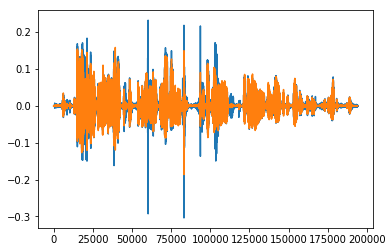

In [119]:
sn, sr=librosa.load('test_x_02.wav', sr=None)
plt.plot(sn)

sn, sr=librosa.load('test_s_02_recons (5).wav', sr=None)
plt.plot(sn)
print("Orange is Recovered Signal and Blue is Original Signal")